In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
stock_df = pd.read_csv("Master_Datasets/master_dataset_1577075841.csv")
stock_df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2019-12-20,69.86,70.2267,69.39,69.94,35091987,XOM
1,2019-12-19,69.99,70.0500,69.24,69.39,13273228,XOM
2,2019-12-18,69.63,70.2900,69.28,69.87,13652100,XOM
3,2019-12-17,69.98,70.3800,69.31,69.68,14450050,XOM
4,2019-12-16,69.70,70.2500,69.70,70.00,15208665,XOM


In [3]:
sector_df = pd.read_csv("Master_Datasets/Query List with Sector.csv")
sector_df.head()

,Unnamed: 0,company,Ticker,occurance,profit ($ millions),revenue ($ millions),year,Industry
0,41,3M,MMM,31,5349.0,32765.0,2019,Industrials
1,36,Abbott Laboratories,ABT,31,5962.9,39873.9,2019,Health Care
2,74,Alcoa,AA,30,2564.0,30896.0,2019,Industrials
3,13,Altria Group,MO,31,14239.0,72944.0,2019,Consumer Staples
4,95,American Electric Power,AEP,25,2047.0,61257.0,2019,Utilities


In [4]:
stock_sector_df = pd.merge(stock_df, sector_df, on="Ticker")
stock_sector_df.head()

,Date,Open,High,Low,Close,Volume,Ticker,Unnamed: 0,company,occurance,profit ($ millions),revenue ($ millions),year,Industry
0,2019-12-20,69.86,70.2267,69.39,69.94,35091987,XOM,0,Exxon Mobil,31,45220.0,452926.0,2019,Energy
1,2019-12-19,69.99,70.0500,69.24,69.39,13273228,XOM,0,Exxon Mobil,31,45220.0,452926.0,2019,Energy
2,2019-12-18,69.63,70.2900,69.28,69.87,13652100,XOM,0,Exxon Mobil,31,45220.0,452926.0,2019,Energy
3,2019-12-17,69.98,70.3800,69.31,69.68,14450050,XOM,0,Exxon Mobil,31,45220.0,452926.0,2019,Energy
4,2019-12-16,69.70,70.2500,69.70,70.00,15208665,XOM,0,Exxon Mobil,31,45220.0,452926.0,2019,Energy


In [5]:
stock_sector_df = stock_sector_df[['Date', 'Close', 'Ticker', 'company', 'Industry']]
stock_sector_df.head()

,Date,Close,Ticker,company,Industry
0,2019-12-20,69.94,XOM,Exxon Mobil,Energy
1,2019-12-19,69.39,XOM,Exxon Mobil,Energy
2,2019-12-18,69.87,XOM,Exxon Mobil,Energy
3,2019-12-17,69.68,XOM,Exxon Mobil,Energy
4,2019-12-16,70.00,XOM,Exxon Mobil,Energy


In [6]:
stock_sector_df['Date'] = stock_df['Date'].apply(pd.to_datetime)

In [7]:
stock_sector_df.count()

Date        770353
Close       921373
Ticker      740149
company     921373
Industry    921373
dtype: int64

In [8]:
clean_stock_df = stock_sector_df.dropna(how="any")

In [9]:
clean_stock_df = clean_stock_df.set_index('Date')
clean_stock_df

,Close,Ticker,company,Industry
Date,,,,
2019-12-20,69.94,XOM,Exxon Mobil,Energy
2019-12-19,69.39,XOM,Exxon Mobil,Energy
2019-12-18,69.87,XOM,Exxon Mobil,Energy
2019-12-17,69.68,XOM,Exxon Mobil,Energy
2019-12-16,70.00,XOM,Exxon Mobil,Energy
...,...,...,...,...
1999-12-27,43.65,THC,Tenet Healthcare,Health Care
1999-12-23,44.12,THC,Tenet Healthcare,Health Care
1999-12-22,44.07,THC,Tenet Healthcare,Health Care


In [10]:
ticker_list = clean_stock_df['Ticker'].unique()

In [11]:
rec_beg_1 = clean_stock_df.loc[clean_stock_df.index =='2001-01-31']
rec_end_1 = clean_stock_df.loc[clean_stock_df.index =='2001-09-28']
rec_beg_2 = clean_stock_df.loc[clean_stock_df.index =='2007-09-28']
rec_end_2 = clean_stock_df.loc[clean_stock_df.index =='2009-02-27']

In [12]:
rec_end_1

,Close,Ticker,company,Industry
Date,,,,
2001-09-28,39.40,XOM,Exxon Mobil,Energy
2001-09-28,70000.00,BRK-A,Berkshire Hathaway,Financials
2001-09-28,47.12,T,AT&T,Communication Services
2001-09-28,40.50,C,Citigroup,Financials
2001-09-28,51.17,MSFT,Microsoft,Information Technology
...,...,...,...,...
2001-09-28,29.72,BDX,Becton Dickinson,Health Care
2001-09-28,18.28,GPS,Gap,Consumer Discretionary
2001-09-28,53.10,CPB,Campbell Soup,Consumer Staples


In [13]:
rec_1_df = pd.merge(rec_beg_1, rec_end_1, on="Ticker")
rec_1_df.head()

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y
0,84.15,XOM,Exxon Mobil,Energy,39.40,Exxon Mobil,Energy
1,68400.00,BRK-A,Berkshire Hathaway,Financials,70000.00,Berkshire Hathaway,Financials
2,48.35,T,AT&T,Communication Services,47.12,AT&T,Communication Services
3,55.97,C,Citigroup,Financials,40.50,Citigroup,Financials
4,61.06,MSFT,Microsoft,Information Technology,51.17,Microsoft,Information Technology


In [14]:
rec_1_df['Delta'] = ((rec_1_df['Close_y'] - rec_1_df['Close_x'])/rec_1_df['Close_x'])*100
rec_1_df

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
0,84.15,XOM,Exxon Mobil,Energy,39.40,Exxon Mobil,Energy,-53.178847
1,68400.00,BRK-A,Berkshire Hathaway,Financials,70000.00,Berkshire Hathaway,Financials,2.339181
2,48.35,T,AT&T,Communication Services,47.12,AT&T,Communication Services,-2.543950
3,55.97,C,Citigroup,Financials,40.50,Citigroup,Financials,-27.639807
4,61.06,MSFT,Microsoft,Information Technology,51.17,Microsoft,Information Technology,-16.197183
...,...,...,...,...,...,...,...,...
108,36.18,BDX,Becton Dickinson,Health Care,29.72,Becton Dickinson,Health Care,-17.855169
109,20.97,GPS,Gap,Consumer Discretionary,18.28,Gap,Consumer Discretionary,-12.827849
110,46.23,CPB,Campbell Soup,Consumer Staples,53.10,Campbell Soup,Consumer Staples,14.860480
111,9.08,JCP,J.C. Penney,Consumer Discretionary,8.21,J.C. Penney,Consumer Discretionary,-9.581498


In [15]:
# rec_1_df['Delta'] = "{:.2%}".format((rec_1_df['Delta'])
# rec_1_df

In [16]:
rec_1_df.sort_values(by='Delta', ascending=False)

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
82,4.00,RAD,Rite Aid,Consumer Staples,7.48,Rite Aid,Consumer Staples,87.000000
88,36.38,PPL,PPL,Utilities,54.41,PPL,Utilities,49.560198
66,93.95,PGR,Progressive,Financials,133.90,Progressive,Financials,42.522618
84,37.50,AEP,American Electric Power,Utilities,49.43,American Electric Power,Utilities,31.813333
86,19.06,WM,Waste Management,Industrials,24.68,Waste Management,Industrials,29.485834
...,...,...,...,...,...,...,...,...
48,31.33,LUV,Southwest Airlines,Industrials,14.84,Southwest Airlines,Industrials,-52.633259
0,84.15,XOM,Exxon Mobil,Energy,39.40,Exxon Mobil,Energy,-53.178847
102,76.93,BBY,Best Buy,Consumer Discretionary,25.58,Best Buy,Consumer Discretionary,-66.748993
94,29.45,NAV,Navistar International,Consumer Discretionary,9.16,Navistar International,Consumer Discretionary,-68.896435


In [17]:
rec_1_top5 = rec_1_df.nlargest(5, 'Delta')
rec_1_top5

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
82,4.00,RAD,Rite Aid,Consumer Staples,7.48,Rite Aid,Consumer Staples,87.000000
88,36.38,PPL,PPL,Utilities,54.41,PPL,Utilities,49.560198
66,93.95,PGR,Progressive,Financials,133.90,Progressive,Financials,42.522618
84,37.50,AEP,American Electric Power,Utilities,49.43,American Electric Power,Utilities,31.813333
86,19.06,WM,Waste Management,Industrials,24.68,Waste Management,Industrials,29.485834


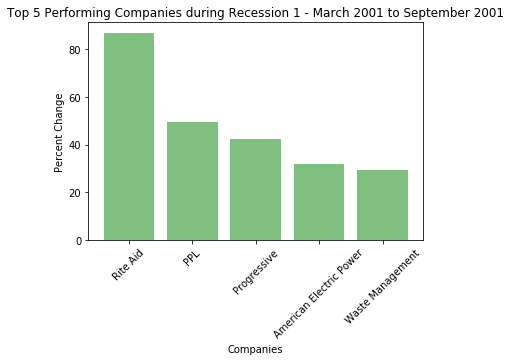

In [18]:
x_axis = rec_1_top5['company_y']
y_axis = rec_1_top5['Delta']
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Top 5 Performing Companies during Recession 1 - March 2001 to September 2001")
plt.xlabel("Companies")
plt.ylabel("Percent Change")
plt.savefig("Rec1Top5.png",bbox_inches = 'tight')

In [19]:
rec_1_bot5 = rec_1_df.nsmallest(5, 'Delta')
rec_1_bot5

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
37,56.71,GLW,Corning,Information Technology,8.82,Corning,Information Technology,-84.447187
94,29.45,NAV,Navistar International,Consumer Discretionary,9.16,Navistar International,Consumer Discretionary,-68.896435
102,76.93,BBY,Best Buy,Consumer Discretionary,25.58,Best Buy,Consumer Discretionary,-66.748993
0,84.15,XOM,Exxon Mobil,Energy,39.40,Exxon Mobil,Energy,-53.178847
48,31.33,LUV,Southwest Airlines,Industrials,14.84,Southwest Airlines,Industrials,-52.633259


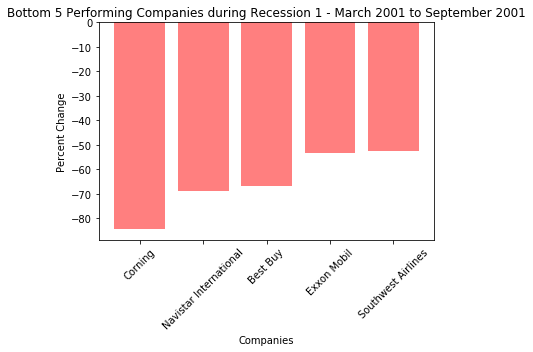

In [20]:
x_axis = rec_1_bot5['company_y']
y_axis = rec_1_bot5['Delta']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Bottom 5 Performing Companies during Recession 1 - March 2001 to September 2001")
plt.xlabel("Companies")
plt.ylabel("Percent Change")
plt.savefig("Rec1Bot5.png",bbox_inches = 'tight')

In [21]:
rec_1_ind_df = rec_1_df.groupby('Industry_y').mean()
rec_1_ind_df

,Close_x,Close_y,Delta
Industry_y,,,
Communication Services,41.026667,33.346667,-16.722738
Consumer Discretionary,37.424444,25.378889,-26.899834
Consumer Staples,41.676667,41.880000,4.776545
Energy,43.633750,32.291250,-20.014064
Financials,5760.083333,5883.589167,-15.724903
Health Care,61.589375,52.429375,-10.276051
Industrials,50.322692,44.958077,-8.999033
Information Technology,43.233333,23.725000,-41.840195
Materials,75.034286,78.275714,1.026779


In [22]:
rec_1_err_df = rec_1_df.groupby('Industry_y').agg({'Delta':['var','mean']})
rec_1_err_df

Delta           
                               var       mean
Industry_y                                   
Communication Services  325.341310 -16.722738
Consumer Discretionary  671.247068 -26.899834
Consumer Staples        652.433634   4.776545
Energy                  515.382469 -20.014064
Financials              636.790160 -15.724903
Health Care             419.342668 -10.276051
Industrials             511.267691  -8.999033
Information Technology  599.573125 -41.840195
Materials               225.475243   1.026779
Real Estate                    NaN  20.879913
Utilities               498.473295   7.494288

In [23]:
rec_1_ind_err_df = pd.merge(rec_1_ind_df, rec_1_err_df, on="Industry_y").reset_index()
# rec_1_ind_err_df.rename(columns={'(Delta, var)': 'Var','(Delta, mean)': 'Mean' })
rec_1_ind_err_df

C:\Users\hbuss\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Industry_y,Close_x,Close_y,Delta,"(Delta, var)","(Delta, mean)"
0,Communication Services,41.026667,33.346667,-16.722738,325.341310,-16.722738
1,Consumer Discretionary,37.424444,25.378889,-26.899834,671.247068,-26.899834
2,Consumer Staples,41.676667,41.880000,4.776545,652.433634,4.776545
3,Energy,43.633750,32.291250,-20.014064,515.382469,-20.014064
4,Financials,5760.083333,5883.589167,-15.724903,636.790160,-15.724903
5,Health Care,61.589375,52.429375,-10.276051,419.342668,-10.276051
6,Industrials,50.322692,44.958077,-8.999033,511.267691,-8.999033
7,Information Technology,43.233333,23.725000,-41.840195,599.573125,-41.840195
8,Materials,75.034286,78.275714,1.026779,225.475243,1.026779
9,Real Estate,27.730000,33.520000,20.879913,NaN,20.879913


In [24]:
rec_1_ind_err_df.sort_values(['Delta'], inplace=True)
rec_1_ind_err_df

,Industry_y,Close_x,Close_y,Delta,"(Delta, var)","(Delta, mean)"
7,Information Technology,43.233333,23.725000,-41.840195,599.573125,-41.840195
1,Consumer Discretionary,37.424444,25.378889,-26.899834,671.247068,-26.899834
3,Energy,43.633750,32.291250,-20.014064,515.382469,-20.014064
0,Communication Services,41.026667,33.346667,-16.722738,325.341310,-16.722738
4,Financials,5760.083333,5883.589167,-15.724903,636.790160,-15.724903
5,Health Care,61.589375,52.429375,-10.276051,419.342668,-10.276051
6,Industrials,50.322692,44.958077,-8.999033,511.267691,-8.999033
8,Materials,75.034286,78.275714,1.026779,225.475243,1.026779
2,Consumer Staples,41.676667,41.880000,4.776545,652.433634,4.776545
10,Utilities,35.710000,37.345000,7.494288,498.473295,7.494288


<ErrorbarContainer object of 3 artists>

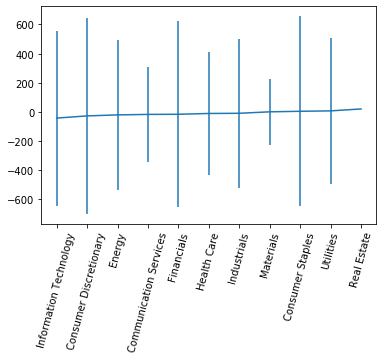

In [25]:
x_axis = rec_1_ind_err_df['Industry_y']
y_axis = rec_1_ind_err_df['Delta']
yerr = rec_1_ind_err_df['Delta' , 'var']
plt.xticks(rotation=75)
plt.errorbar(x_axis, y_axis, yerr)

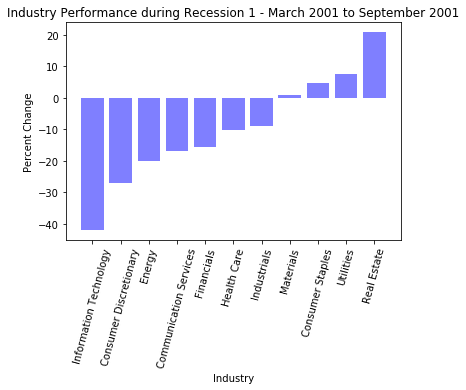

In [26]:
fig, ax = plt.subplots()
x_axis = rec_1_ind_err_df['Industry_y']
y_axis = rec_1_ind_err_df['Delta']
yerr = rec_1_ind_err_df['Delta' , 'var']
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=75)
plt.title("Industry Performance during Recession 1 - March 2001 to September 2001")
plt.xlabel("Industry")
plt.ylabel("Percent Change")
plt.savefig("Rec1Ind.png", bbox_inches='tight')

In [27]:
rec_2_df = pd.merge(rec_beg_2, rec_end_2, on="Ticker")
rec_2_df.head()

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y
0,92.56,XOM,Exxon Mobil,Energy,67.90,Exxon Mobil,Energy
1,118510.00,BRK-A,Berkshire Hathaway,Financials,78600.00,Berkshire Hathaway,Financials
2,42.31,T,AT&T,Communication Services,23.77,AT&T,Communication Services
3,46.67,C,Citigroup,Financials,1.50,Citigroup,Financials
4,29.46,MSFT,Microsoft,Information Technology,16.15,Microsoft,Information Technology


In [28]:
rec_2_df['Delta'] = ((rec_2_df['Close_y'] - rec_2_df['Close_x'])/rec_2_df['Close_x'])*100
rec_2_df

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
0,92.56,XOM,Exxon Mobil,Energy,67.9000,Exxon Mobil,Energy,-26.642178
1,118510.00,BRK-A,Berkshire Hathaway,Financials,78600.0000,Berkshire Hathaway,Financials,-33.676483
2,42.31,T,AT&T,Communication Services,23.7700,AT&T,Communication Services,-43.819428
3,46.67,C,Citigroup,Financials,1.5000,Citigroup,Financials,-96.785944
4,29.46,MSFT,Microsoft,Information Technology,16.1500,Microsoft,Information Technology,-45.179905
...,...,...,...,...,...,...,...,...
113,95.06,LEA,Lear,Industrials,115.2000,Lear,Industrials,21.186619
114,23.36,GPS,Gap,Consumer Discretionary,45.9000,Gap,Consumer Discretionary,96.489726
115,1.28,VFF,VF,Consumer Discretionary,0.8422,VF,Consumer Discretionary,-34.203125
116,29.30,CPB,Campbell Soup,Consumer Staples,22.0300,Campbell Soup,Consumer Staples,-24.812287


In [29]:
rec_2_df.sort_values(by='Delta', ascending=False)

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
96,4.80,CNP,CenterPoint Energy,Utilities,12.21,CenterPoint Energy,Utilities,154.375000
106,19.89,BBY,Best Buy,Consumer Discretionary,46.49,Best Buy,Consumer Discretionary,133.735546
105,27.33,ROK,Rockwell Automation,Industrials,61.27,Rockwell Automation,Industrials,124.185876
109,30.49,EMN,Eastman Chemical,Materials,67.41,Eastman Chemical,Materials,121.088882
111,17.98,OI,Owens-Illinois,Industrials,35.61,Owens-Illinois,Industrials,98.053393
...,...,...,...,...,...,...,...,...
72,30.41,GT,Goodyear Tire & Rubber,Industrials,4.44,Goodyear Tire & Rubber,Industrials,-85.399540
86,6.21,RAD,Rite Aid,Consumer Staples,0.89,Rite Aid,Consumer Staples,-85.668277
61,31.50,CBS,CBS,Communication Services,4.27,CBS,Communication Services,-86.444444
80,62.21,TXT,Textron,Industrials,5.65,Textron,Industrials,-90.917859


In [30]:
rec_2_top5 = rec_2_df.nlargest(5, 'Delta')
rec_2_top5

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
96,4.80,CNP,CenterPoint Energy,Utilities,12.21,CenterPoint Energy,Utilities,154.375000
106,19.89,BBY,Best Buy,Consumer Discretionary,46.49,Best Buy,Consumer Discretionary,133.735546
105,27.33,ROK,Rockwell Automation,Industrials,61.27,Rockwell Automation,Industrials,124.185876
109,30.49,EMN,Eastman Chemical,Materials,67.41,Eastman Chemical,Materials,121.088882
111,17.98,OI,Owens-Illinois,Industrials,35.61,Owens-Illinois,Industrials,98.053393


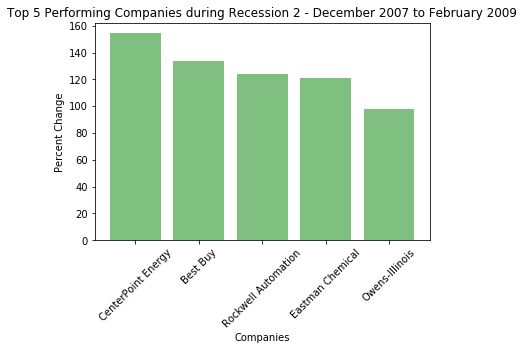

In [31]:
x_axis = rec_2_top5['company_y']
y_axis = rec_2_top5['Delta']
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Top 5 Performing Companies during Recession 2 - December 2007 to February 2009")
plt.xlabel("Companies")
plt.ylabel("Percent Change")
plt.savefig("Rec2Top5.png",bbox_inches = 'tight')

In [32]:
rec_2_bot5 = rec_2_df.nsmallest(5, 'Delta')
rec_2_bot5

,Close_x,Ticker,company_x,Industry_x,Close_y,company_y,Industry_y,Delta
3,46.67,C,Citigroup,Financials,1.50,Citigroup,Financials,-96.785944
80,62.21,TXT,Textron,Industrials,5.65,Textron,Industrials,-90.917859
61,31.50,CBS,CBS,Communication Services,4.27,CBS,Communication Services,-86.444444
86,6.21,RAD,Rite Aid,Consumer Staples,0.89,Rite Aid,Consumer Staples,-85.668277
72,30.41,GT,Goodyear Tire & Rubber,Industrials,4.44,Goodyear Tire & Rubber,Industrials,-85.399540


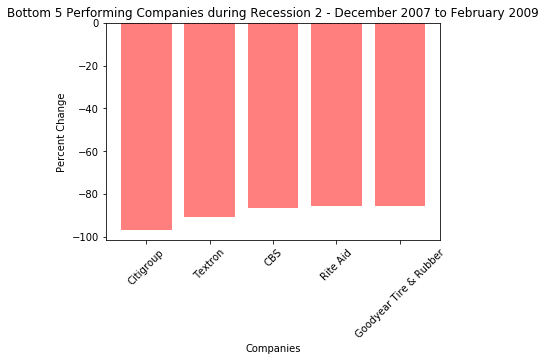

In [33]:
x_axis = rec_2_bot5['company_y']
y_axis = rec_2_bot5['Delta']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Bottom 5 Performing Companies during Recession 2 - December 2007 to February 2009")
plt.xlabel("Companies")
plt.ylabel("Percent Change")
plt.savefig("Rec2Bot5.png",bbox_inches = 'tight')

In [34]:
rec_2_ind_df = rec_2_df.groupby('Industry_y').mean()
rec_2_ind_df

,Close_x,Close_y,Delta
Industry_y,,,
Communication Services,32.785000,12.765000,-62.303555
Consumer Discretionary,30.403000,25.521220,-8.655602
Consumer Staples,48.314000,35.919333,-25.701359
Energy,66.430000,32.086250,-53.174992
Financials,9160.642308,6062.866154,-54.207522
Health Care,55.242000,36.302667,-35.115243
Industrials,66.974483,32.883103,-42.348959
Information Technology,23.908333,12.301667,-32.461302
Materials,44.881429,31.130000,-17.448977


In [35]:
rec_2_err_df = rec_2_df.groupby('Industry_y').agg({'Delta':['var','mean']})
rec_2_err_df

Delta           
                                var       mean
Industry_y                                    
Communication Services   314.192922 -62.303555
Consumer Discretionary  4579.187691  -8.655602
Consumer Staples        1055.438073 -25.701359
Energy                   379.733048 -53.174992
Financials              1014.460732 -54.207522
Health Care              590.994669 -35.115243
Industrials             2452.534839 -42.348959
Information Technology  2782.164481 -32.461302
Materials               5677.731812 -17.448977
Real Estate                     NaN  19.102235
Utilities               3714.462913 -11.394038

In [36]:
rec_2_ind_err_df = pd.merge(rec_2_ind_df, rec_2_err_df, on="Industry_y").reset_index()
rec_2_ind_err_df.sort_values(['Delta'], inplace=True)
rec_2_ind_err_df

,Industry_y,Close_x,Close_y,Delta,"(Delta, var)","(Delta, mean)"
0,Communication Services,32.785000,12.765000,-62.303555,314.192922,-62.303555
4,Financials,9160.642308,6062.866154,-54.207522,1014.460732,-54.207522
3,Energy,66.430000,32.086250,-53.174992,379.733048,-53.174992
6,Industrials,66.974483,32.883103,-42.348959,2452.534839,-42.348959
5,Health Care,55.242000,36.302667,-35.115243,590.994669,-35.115243
7,Information Technology,23.908333,12.301667,-32.461302,2782.164481,-32.461302
2,Consumer Staples,48.314000,35.919333,-25.701359,1055.438073,-25.701359
8,Materials,44.881429,31.130000,-17.448977,5677.731812,-17.448977
10,Utilities,50.924000,35.272000,-11.394038,3714.462913,-11.394038
1,Consumer Discretionary,30.403000,25.521220,-8.655602,4579.187691,-8.655602


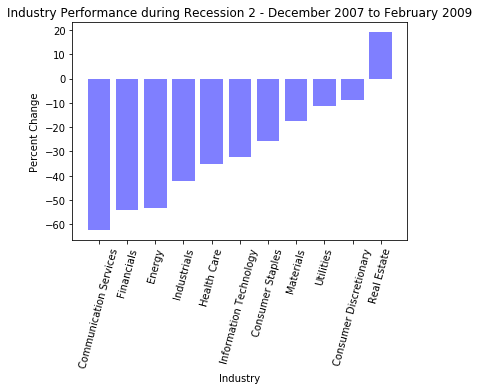

<Figure size 720x720 with 0 Axes>

In [41]:
x_axis = rec_2_ind_err_df['Industry_y']
y_axis = rec_2_ind_err_df['Delta']
# yerr = rec_1_ind_err_df['var']
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=75)
plt.title("Industry Performance during Recession 2 - December 2007 to February 2009")
plt.xlabel("Industry")
plt.ylabel("Percent Change")
plt.figure(figsize=(10,10))

plt.savefig("Rec3Ind", bbox_inches='tight')